In [1]:
import gc
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import category_encoders as ce
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

import sys
sys.path.append("../utils")
from metrics import compute_recall_at4, compute_normalized_gini, compute_amex_metric

pd.set_option('display.max_columns', None)

In [2]:
# metrics in lgbm format

def metric_recall_at4(y_pred: np.ndarray, data: lgb.Dataset):
    y_true = data.get_label()
    return 'recall_at4', compute_recall_at4(y_true, y_pred), True

def metric_normalized_gini(y_pred: np.ndarray, data: lgb.Dataset):
    y_true = data.get_label()
    return 'norm_gini', compute_normalized_gini(y_true, y_pred), True

def metric_amex(y_pred: np.ndarray, data: lgb.Dataset):
    y_true = data.get_label()
    return 'amex_metric', compute_amex_metric(y_true, y_pred), True

***
## load and prepare data

In [3]:
!ls ../data/processed/dsv03

test.parquet  train.parquet


In [4]:
train_agg = pd.read_parquet("../data/processed/dsv03/train.parquet")
train_labels = pd.read_csv("../data/raw/train_labels.csv", index_col="customer_ID")

In [6]:
input_feats = train_agg.columns.tolist()

_categ_feats = [
    'B_30', 'B_38', 'D_114', 'D_116', 'D_117', 
    'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68',
]
categ_feats = [f"{col}-{i}" for col in _categ_feats for i in range(1,14)]

print(len(input_feats))
print(len(categ_feats))

2444
143


In [7]:
train_agg = pd.merge(train_agg, train_labels, how="inner", left_index=True, right_index=True)
train_agg = train_agg.reset_index()

del train_labels
gc.collect()

72

***
## model training

In [10]:
# todo: implement repeated cross validation
glob("../data/processed/cv*.parquet")

['../data/processed/cv1.parquet',
 '../data/processed/cv2.parquet',
 '../data/processed/cv4.parquet',
 '../data/processed/cv0.parquet',
 '../data/processed/cv3.parquet']

In [11]:
folds = pd.read_parquet('../data/processed/cv0.parquet')
train_agg = pd.merge(train_agg, folds, how="inner", on="customer_ID")

In [12]:
model_params = {
    'objective': 'binary',
    'metric': 'None',
    'learning_rate': 0.05,
    'num_leaves': 64,
    'force_col_wise': True,
    'bagging_freq': 1,
    'seed': 2112,
    'verbosity': 0,
    'first_metric_only': True,
    'bin_construct_sample_cnt': 100000000,
    'feature_pre_filter': False,
    'bagging_fraction': 0.9,
    'feature_fraction': 0.2,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'min_data_in_leaf': 1000,
    'path_smooth': 10,
    'max_bin': 255,
}

######################################## training model 1/5 ########################################


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negativ

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


Training until validation scores don't improve for 100 rounds
[50]	valid_0's amex_metric: 0.768723	valid_0's recall_at4: 0.626988	valid_0's norm_gini: 0.910458
[100]	valid_0's amex_metric: 0.783802	valid_0's recall_at4: 0.64992	valid_0's norm_gini: 0.917683
[150]	valid_0's amex_metric: 0.788823	valid_0's recall_at4: 0.656779	valid_0's norm_gini: 0.920868
[200]	valid_0's amex_metric: 0.791265	valid_0's recall_at4: 0.660229	valid_0's norm_gini: 0.922301
[250]	valid_0's amex_metric: 0.791794	valid_0's recall_at4: 0.660608	valid_0's norm_gini: 0.92298
[300]	valid_0's amex_metric: 0.792363	valid_0's recall_at4: 0.661281	valid_0's norm_gini: 0.923445
[350]	valid_0's amex_metric: 0.793927	valid_0's recall_at4: 0.664184	valid_0's norm_gini: 0.923671
[400]	valid_0's amex_metric: 0.793696	valid_0's recall_at4: 0.663595	valid_0's norm_gini: 0.923797
[450]	valid_0's amex_metric: 0.793859	valid_0's recall_at4: 0.663805	valid_0's norm_gini: 0.923913
Early stopping, best iteration is:
[351]	valid_0's

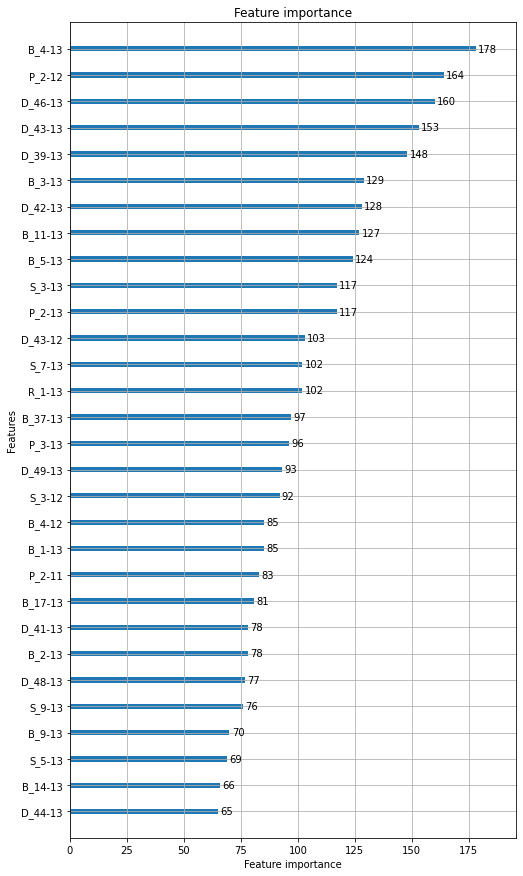

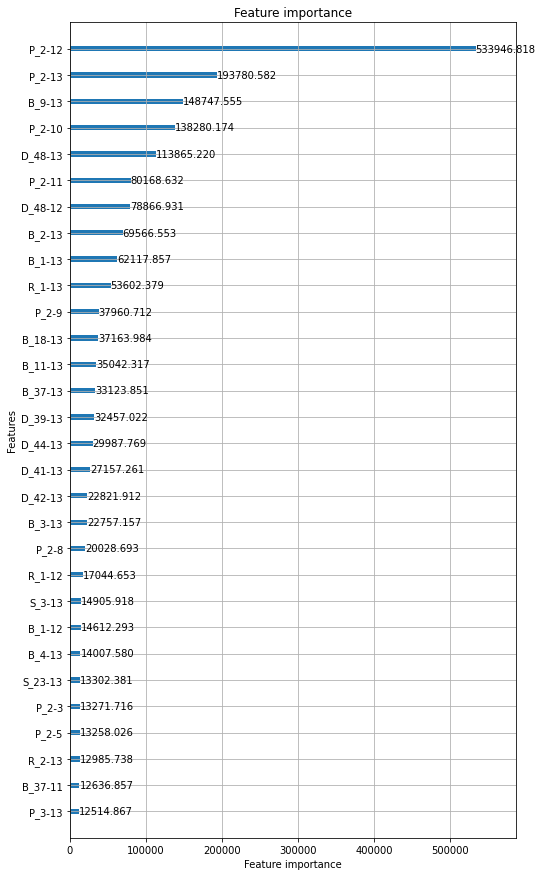

######################################## training model 2/5 ########################################
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning

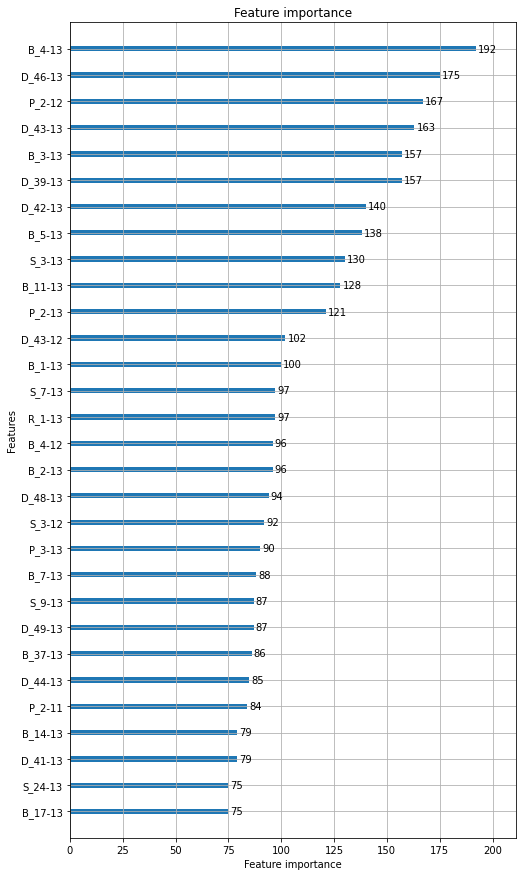

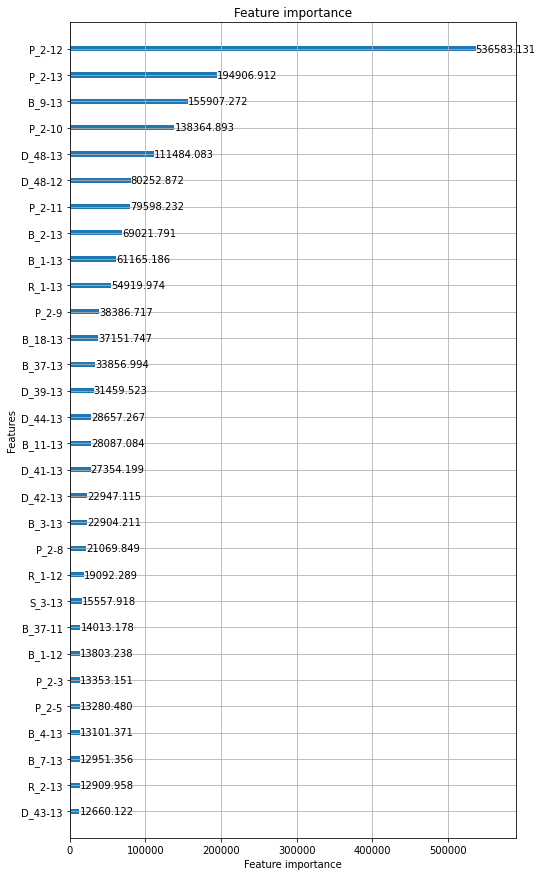

######################################## training model 3/5 ########################################
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning

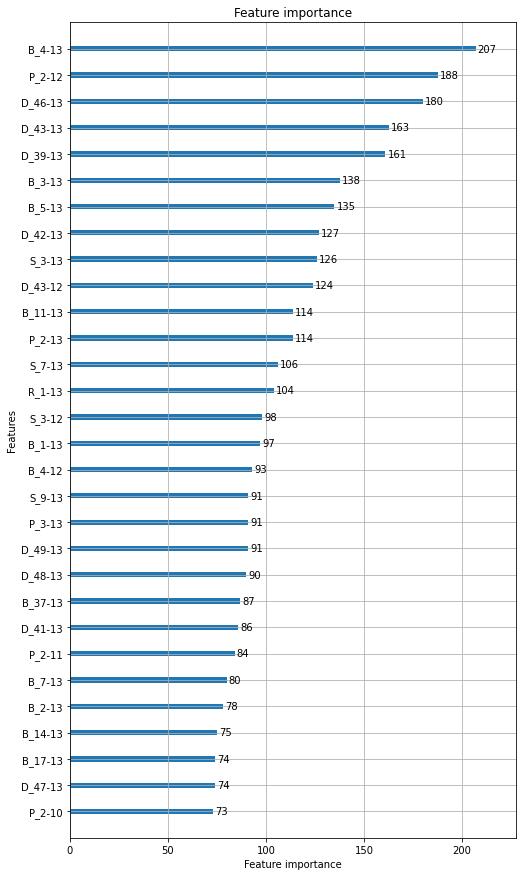

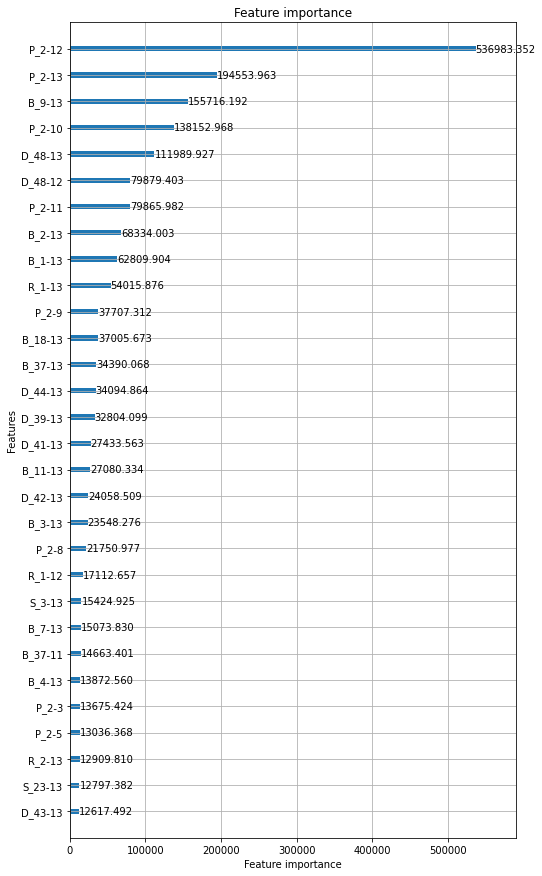

######################################## training model 4/5 ########################################
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning

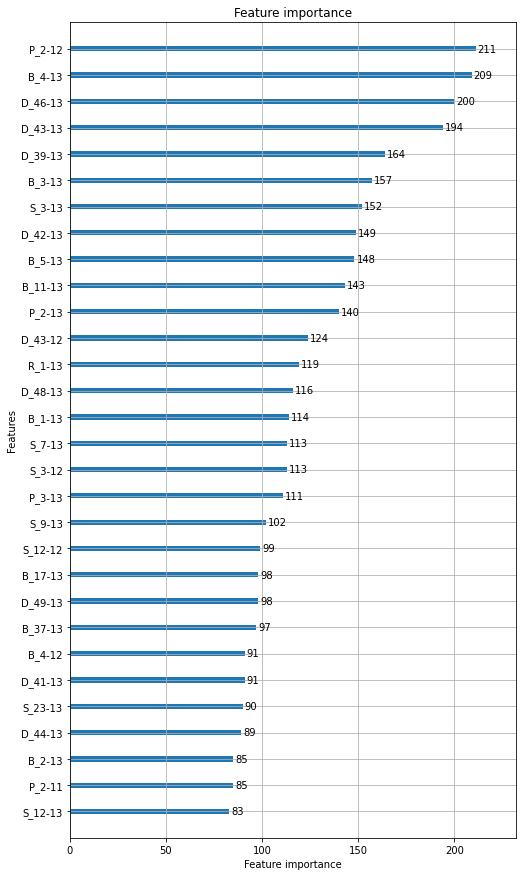

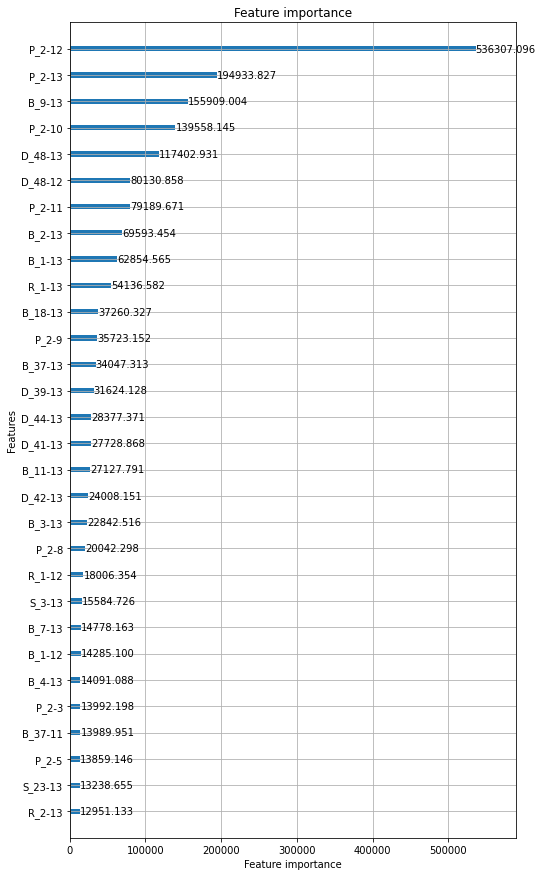

######################################## training model 5/5 ########################################
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning

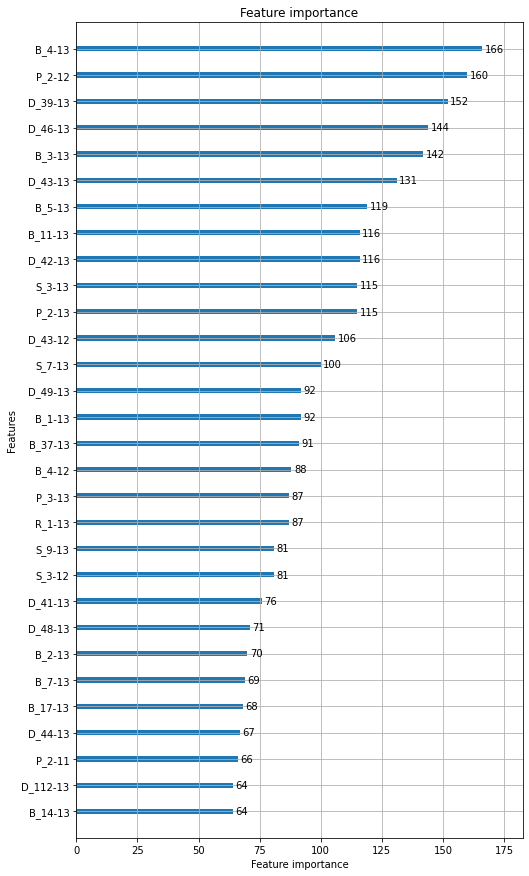

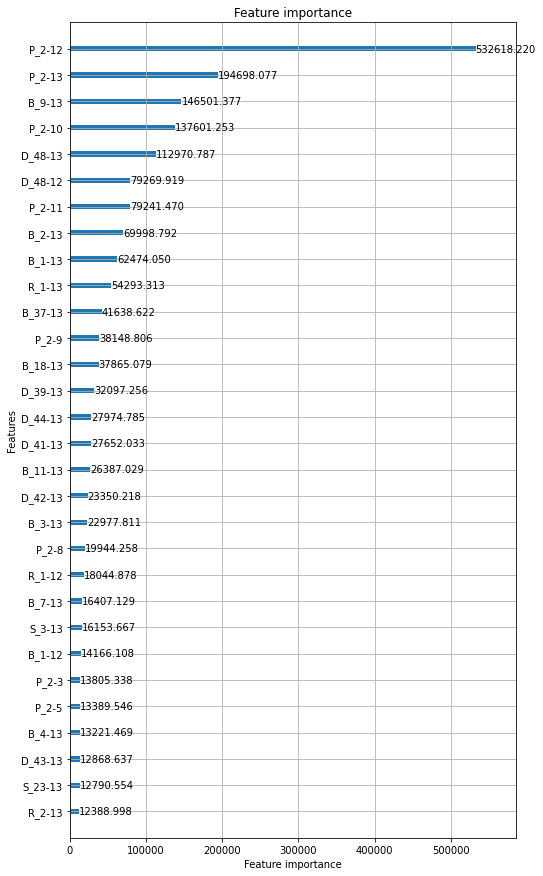

CPU times: user 2h 26min 22s, sys: 46.7 s, total: 2h 27min 8s
Wall time: 24min 18s


In [13]:
%%time
models = list()

# dataframe to store the oof predictions
oof = train_agg[["target"]].copy()
oof["pred"] = -1

for fold in range(5):
    
    print(f" training model {fold+1}/{5} ".center(100, "#"))
    
    train_df = train_agg.query("fold != @fold")
    valid_df = train_agg.query("fold == @fold")
    
    train_dset = lgb.Dataset(
        data=train_df.loc[:,input_feats],
        label=train_df.loc[:,"target"].values,
        categorical_feature=categ_feats,
        free_raw_data=True
    )
    valid_dset = lgb.Dataset(
        data=valid_df.loc[:,input_feats],
        label=valid_df.loc[:,"target"].values,
        categorical_feature=categ_feats,
        free_raw_data=True
    )
    
    model = lgb.train(
        params=model_params,
        train_set=train_dset,
        valid_sets=[valid_dset,],
        feval=[metric_amex, metric_recall_at4, metric_normalized_gini],
        num_boost_round=3000,
        callbacks=[lgb.log_evaluation(period=50), lgb.early_stopping(100)],
    )
    #model.save_model(f"model_lgb_{fold}.txt")
    
    lgb.plot_importance(model, figsize=(8,15), importance_type="split", max_num_features=30)
    lgb.plot_importance(model, figsize=(8,15), importance_type="gain", max_num_features=30)
    plt.show()
    
    oof.loc[valid_df.index,"pred"] = model.predict(valid_df.loc[:,input_feats])
        
    models.append(model)
    del train_dset,valid_dset
    gc.collect()

In [14]:
# oof metrics
print("OOF recall_at4:", compute_recall_at4(oof.target.values, oof.pred.values))
print("OOF normalized_gini:", compute_normalized_gini(oof.target.values, oof.pred.values))
print("OOF competition metric:", compute_amex_metric(oof.target.values, oof.pred.values))

OOF recall_at4: 0.6578920793079073
OOF normalized_gini: 0.9221896795716134
OOF competition metric: 0.7900408794397603


In [15]:
del train_agg
gc.collect()

48

***
## make predictions and submit

In [16]:
test = pd.read_parquet("../data/processed/dsv03/test.parquet")
sub = pd.read_csv("../data/raw/sample_submission.csv")

In [ ]:
%%time
preds = [model.predict(test[input_feats]) for model in models]
test["prediction"] = np.mean(preds, axis=0)

In [ ]:
sub["prediction"] = test.loc[sub.customer_ID.values,"prediction"].values
sub

In [ ]:
assert sub.prediction.isna().sum() == 0

In [17]:
sub.to_csv("../data/subs/lgbm-bce-dsv02.csv", index=False)

***